<a href="https://colab.research.google.com/github/Habibu-Ahmad/Deepfake_Detection/blob/main/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data and Setup**

In [10]:
df = pd.read_csv("/content/wilddeep_dataset.csv")

X = df.drop("label", axis=1)
y = df["label"]

# Convert string labels to numerical labels
y = y.map({'fake': 0, 'real': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Random Forest**

Accuracy: 0.9132935092724679
Precision: 0.9112550471063257
Recall: 0.9240808666723535
F1 Score: 0.9176231417559612


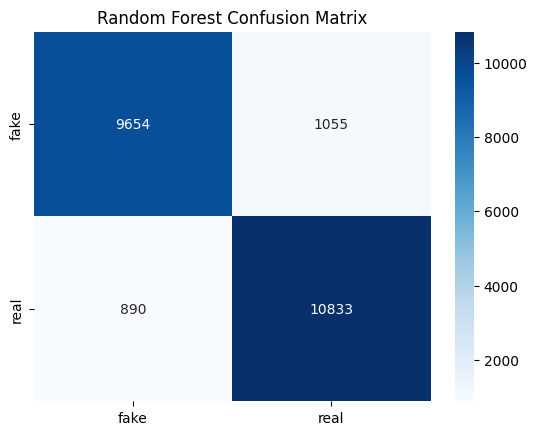

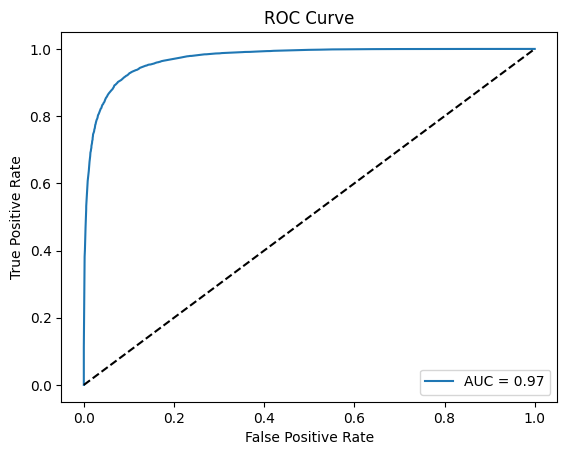

In [4]:
rf_model = RandomForestClassifier(n_estimators=250, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**SVM**

SVM Accuracy: 0.7704618402282454
SVM Precision: 0.7596366508688783
SVM Recall: 0.8203531519235691
SVM F1 Score: 0.788828281999754


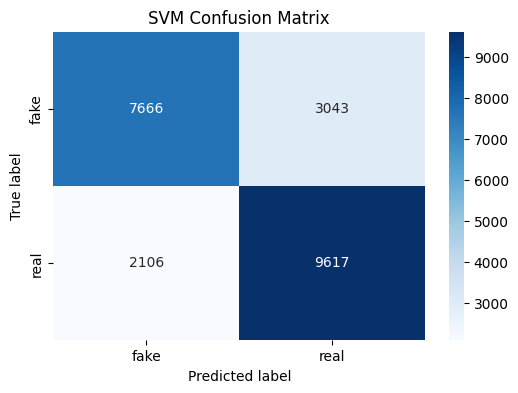

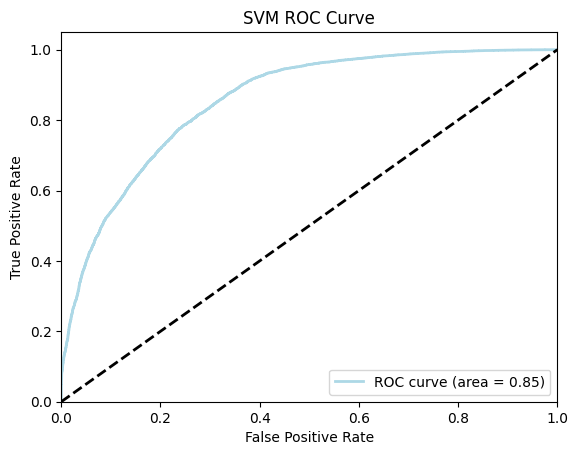

In [7]:
# Initialize and train SVM classifier
svm_model = SVC(kernel='rbf', random_state=1)
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, pos_label=1)
svm_recall = recall_score(y_test, svm_y_pred, pos_label=1)
svm_f1 = f1_score(y_test, svm_y_pred, pos_label=1)


# Print metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

# Generate and plot confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.title("SVM Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Plot ROC curve
svm_probs = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, svm_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='lightblue', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

XGBoost Accuracy: 0.8914942938659058
XGBoost Precision: 0.8903925359334286
XGBoost Recall: 0.9036082913929881
XGBoost F1 Score: 0.8969517358171042


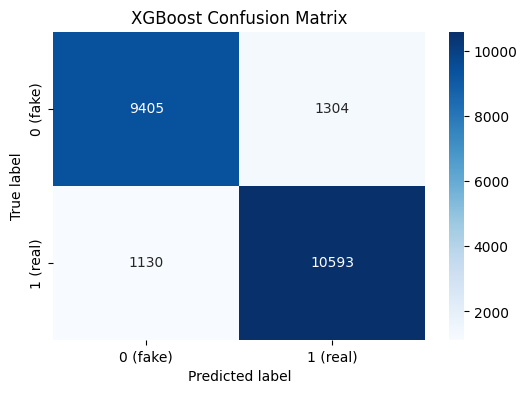

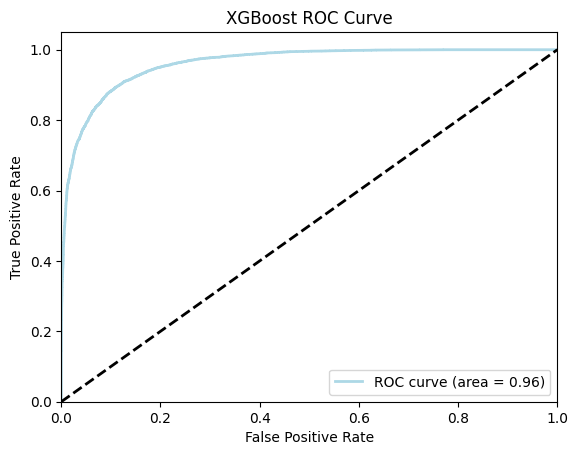

In [8]:
# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=200,
    random_state=1
)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance - using numeric labels (0/1)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred, pos_label=1)
xgb_recall = recall_score(y_test, xgb_y_pred, pos_label=1)
xgb_f1 = f1_score(y_test, xgb_y_pred, pos_label=1)

# Print metrics
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)

# Generate and plot confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=['0 (fake)', '1 (real)'], yticklabels=['0 (fake)', '1 (real)'])
plt.title("XGBoost Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='lightblue', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()